In [1]:
from scipy.io import loadmat
from matplotlib import rcParams
from matplotlib import *
from matplotlib.pyplot import *
from cmath import sqrt
from pylab import *
from scipy.fft import fft
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = loadmat('/Users/home/Desktop/computational N/stuff/EEG_P2090_processed.mat') 

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])

In [4]:
dict_values = data.values()
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])

In [5]:
eeg_np = data["EEG_P2090_processed"]
print(type(eeg_np))
print(np.shape(eeg_np), " ---- ", "number of samples : ", np.shape(eeg_np)[0], " ---- ", "number of pulse recording for (5 min) for each sample : ", np.shape(eeg_np)[1] )
print(len(eeg_np))

<class 'numpy.ndarray'>
(29, 150310)  ----  number of samples :  29  ----  number of pulse recording for (5 min) for each sample :  150310
29


In [6]:
eeg_df = pd.DataFrame(eeg_np)
eeg_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,150300,150301,150302,150303,150304,150305,150306,150307,150308,150309
0,0.080990,0.386717,0.854558,1.369273,1.775364,1.935024,1.790643,1.383621,0.844223,0.343582,...,0.444511,0.340075,0.254014,0.193008,0.176326,0.226059,0.256181,0.206121,0.124339,0.079133
1,0.065890,0.425194,0.916954,1.382788,1.678143,1.728797,1.560717,1.253190,0.899624,0.583561,...,0.466665,0.408453,0.314851,0.162314,0.026467,0.052920,0.163130,0.251713,0.339421,0.450619
2,0.149933,0.587816,1.047480,1.300042,1.227097,0.909543,0.524751,0.225350,0.051347,-0.043986,...,-0.434578,-0.021979,0.064616,-0.385328,-0.985117,-0.800041,-0.405910,-0.078373,0.257982,0.177187
3,0.026240,0.365052,0.825173,1.272238,1.575934,1.668481,1.545624,1.249665,0.848513,0.429484,...,0.015890,0.097779,0.181630,0.219542,0.211561,0.191608,0.184762,0.193439,0.206354,0.211864
4,-0.010890,0.328977,0.732773,1.041978,1.155536,1.079993,0.895540,0.683219,0.477345,0.278172,...,0.214292,0.297187,0.428909,0.586793,0.743199,0.859784,0.823283,0.598198,0.303084,0.089522
5,0.040865,0.295336,0.643897,0.989156,1.214826,1.284558,1.187309,0.966005,0.689165,0.427497,...,0.134530,0.073990,0.155315,0.398454,0.629160,0.504920,0.308681,0.216549,0.152678,0.313154
6,0.050745,0.387422,0.881173,1.405119,1.820377,2.034337,2.032027,1.856651,1.583896,1.297254,...,0.755454,0.609467,0.377186,0.096788,-0.135943,-0.203564,-0.124127,0.023485,0.185405,0.317972
7,0.152270,0.254412,0.328592,0.295240,0.126094,-0.120209,-0.344155,-0.466120,-0.469622,-0.397170,...,-1.161915,-1.026764,-0.811817,-0.675559,-0.683125,-0.764934,-0.691735,-0.352397,0.104523,0.444625
8,-0.401814,-0.468601,-0.469602,-0.365922,-0.213943,-0.128348,-0.070686,-0.041043,-0.053569,-0.038622,...,0.222534,0.182637,0.153528,0.255974,0.416903,0.379791,0.207622,0.032554,-0.188132,-0.275319
9,0.001473,0.115603,0.190641,0.158064,0.040921,-0.053626,-0.009927,0.189380,0.434094,0.554896,...,0.533785,0.540933,0.595412,0.711162,0.866807,1.003327,0.961023,0.685044,0.318719,0.127207


In [7]:
sampling_frequency = 500
n_samples = eeg_df.shape[1]
time_scale = 1 / sampling_frequency
time_column = np.arange(0, n_samples) * time_scale
print(time_column)
print(len(time_column))
print("Each trial test time (second) : ", time_column[-1])
print("Each trial test time (minute) : ", time_column[-1] / 60)

[0.00000e+00 2.00000e-03 4.00000e-03 ... 3.00614e+02 3.00616e+02
 3.00618e+02]
150310
Each trial test time (second) :  300.618
Each trial test time (minute) :  5.0103


In [8]:
pip install pyeeg

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pyeeg


ModuleNotFoundError: No module named 'pyeeg'

In [ ]:
eeg = pyeeg.EEG(sfreq=data.attrs["sfreq"],
                n_channels=eeg_data.shape[0],
                ch_names=data.attrs["ch_names"])


In [ ]:
eeg.plot_scalp_map()
eeg.plot_erp()
eeg.plot_spectrogram()


In [22]:
global time_start, time_stop
time_start = 100
time_stop = 110
n_samples = eeg_df.shape[1]

In [26]:
sample_index_start = int(time_start * sampling_frequency)
sample_index_stop = int(time_stop * sampling_frequency)
n_sample_trial = len(eeg_time_between)


In [27]:
eeg_df_subset = eeg_df.iloc[:, sample_index_start : sample_index_stop + 1]
eeg_time_between = time_column[sample_index_start : sample_index_stop + 1]

In [28]:
cols_index = np.arange(0, len(eeg_time_between), 1)
eeg_df_subset.columns = cols_index
median_values = eeg_df_subset.median(axis=0)
range_values = eeg_df_subset.max(axis=0) - eeg_df_subset.min(axis=0)
mn = eeg_df_subset.mean(0)
sd = eeg_df_subset.std(0)
sdmn = sd / np.sqrt(n_sample_trial)

In [29]:
print(
    len(sd),
    len(mn),
    len(sdmn),
    len(median_values),
    len(range_values),
    len(eeg_time_between),
)

5001 5001 5001 5001 5001 5001


FileNotFoundError: [Errno 2] No such file or directory: './Plot/plot_between_100_and_110_seconds.png'

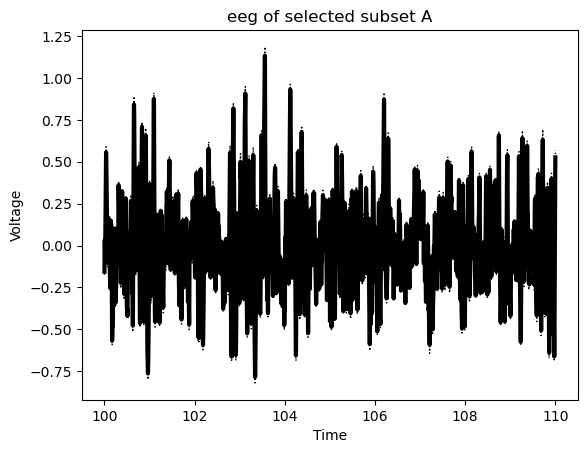

In [32]:
plot(eeg_time_between, mn, "k", lw=3)
plot(eeg_time_between, mn + 2 * sdmn, "k:", lw=1)
plot(eeg_time_between, mn - 2 * sdmn, "k:", lw=1)

xlabel("Time")  
ylabel("Voltage")

title("eeg of selected subset A")  # ... provide a useful title,
savefig(f"./Plot/plot_between_{time_start}_and_{time_stop}_seconds")
show()

In [33]:
column_indexes = np.arange(0, len(eeg_time_between), 1)
row_indexes = [
    "mean",
    "standard_deviation",
    "mean_standard_deviation",
    "median_values",
    "value_range",
    "sample_time",
]


main_df = pd.DataFrame(index=row_indexes, columns=column_indexes)


print(main_df.shape)
main_df.head()

(6, 5001)


,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_deviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_standard_deviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
